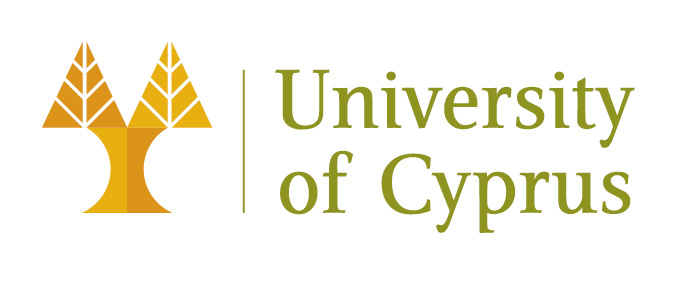

# Introduction to python: LECTURE 7: Error and Exception Handling & Unit Testing

## By: Panagiotis Herodotou

# Errors and Exception Handling

In this lecture we will learn about Errors and Exception Handling in Python. You've definitely already encountered errors by this point in the course. For example:

In [9]:
print('Hello)

SyntaxError: unterminated string literal (detected at line 1) (1679058590.py, line 1)

Note how we get a SyntaxError, with the further description that it was an EOL (End of Line Error) while scanning the string literal. This is specific enough for us to see that we forgot a single quote at the end of the line. Understanding these various error types will help you debug your code much faster. 

This type of error and description is known as an Exception. Even if a statement or expression is syntactically correct, it may cause an error when an attempt is made to execute it. Errors detected during execution are called exceptions and are not unconditionally fatal.

You can check out the full list of built-in exceptions [here](https://docs.python.org/3/library/exceptions.html). Now let's learn how to handle errors and exceptions in our own code.

## try and except

The basic terminology and syntax used to handle errors in Python are the <code>try</code> and <code>except</code> statements. The code which can cause an exception to occur is put in the <code>try</code> block and the handling of the exception is then implemented in the <code>except</code> block of code. The syntax follows:

    try:
       You do your operations here...
       ...
       
    except ExceptionI:
       If there is some error , then execute this block ExceptionI.
       
    except ExceptionII:
       If there is ExceptionII, then execute this block.
       ...
       
    else:
       If there is no exception then execute this block. 

We can also just check for any exception with just using <code>except:</code> To get a better understanding of all this let's check out an example: We will look at some code that opens and writes a file:

In [14]:
try:
    f = open('testfile','w')
    f.write('Test write this')
    
except IOError:
    # This will only check for an IOError exception and then execute this print statement
    print("Error: Could not find file or read data")
    
else:
    print("Content written successfully")
    f.close()

Content written successfully


Now let's see what would happen if we did not have write permission (opening only with 'r'):

In [18]:
try:
    f = open('testfile','r')
    f.write('Test write this')
except IOError:
    
    # This will only check for an IOError exception and then execute this print statement
    print("Error: Could not find file or read data")
    
else:
    print("Content written successfully")
    f.close()

Error: Could not find file or read data


Great! Notice how we only printed a statement! The code still ran and we were able to continue doing actions and running code blocks. This is extremely useful when you have to account for possible input errors in your code. You can be prepared for the error and keep running code, instead of your code just breaking as we saw above.

We could have also just said <code>except:</code> if we weren't sure what exception would occur. For example:

In [21]:
try:
    f = open('testfile','r')
    f.write('Test write this')
except:
    # This will check for any exception and then execute this print statement
    print("Error: Could not find file or read data")
else:
    print("Content written successfully")
    f.close()

Error: Could not find file or read data


Great! Now we don't actually need to memorize that list of exception types! Now what if we kept wanting to run code after the exception occurred? This is where <code>finally</code> comes in.

## finally
The <code>finally:</code> block of code **will always be run** regardless if there was an exception in the <code>try</code> code block. The syntax is:

    try:
       Code block here
       ...
       Due to any exception, this code may be skipped!
    finally:
       This code block would always be executed.

For example:

In [29]:
try:
    f = open("testfile", "w")
    f.write("Test write statement")
    f.close()
finally:
    print("Always execute finally code blocks")

Always execute finally code blocks


We can use this in conjunction with <code>except</code>. Let's see a new example that will take into account a user providing the wrong input:

In [34]:
def askint():
    try:
        val = int(input("Please enter an integer: "))
    except:
        print("Looks like you did not enter an integer!")

    finally:
        print("Finally, I executed!")
    print(val)

In [36]:
askint()

Please enter an integer:  5


Finally, I executed!
5


In [ ]:
askint()

Notice how we got an error when trying to print val (because it was never properly assigned). Let's remedy this by asking the user and checking to make sure the input type is an integer:

In [42]:
def askint():
    try:
        val = int(input("Please enter an integer: "))
    except:
        print("Looks like you did not enter an integer!")
        val = int(input("Try again-Please enter an integer: "))
    finally:
        print("Finally, I executed!")
    print(val)

In [44]:
askint()

Please enter an integer:  sdghsrg


Looks like you did not enter an integer!


Try again-Please enter an integer:  8


Finally, I executed!
8


Hmmm...that only did one check. How can we continually keep checking? We can use a while loop!

In [46]:
def askint():
    while True:
        try:
            val = int(input("Please enter an integer: "))
        except:
            print("Looks like you did not enter an integer!")
            continue
        else:
            print("Yep that's an integer!")
            break
        finally:
            print("Finally, I executed!")
        print(val)

In [51]:
askint()

Please enter an integer:  gui


Looks like you did not enter an integer!
Finally, I executed!


Please enter an integer:  8


Yep that's an integer!
Finally, I executed!


So why did our function print "Finally, I executed!" after each trial, yet it never printed `val` itself? This is because with a try/except/finally clause, any <code>continue</code> or <code>break</code> statements are reserved until *after* the try clause is completed. This means that even though a successful input of **3** brought us to the <code>else:</code> block, and a <code>break</code> statement was thrown, the try clause continued through to <code>finally:</code> before breaking out of the while loop. And since <code>print(val)</code> was outside the try clause, the <code>break</code> statement prevented it from running.

Let's make one final adjustment:

In [13]:
def askint():
    while True:
        try:
            val = int(input("Please enter an integer: "))
        except:
            print("Looks like you did not enter an integer!")
            continue
        else:
            print("Yep that's an integer!")
            print(val)
            break
        finally:
            print("Finally, I executed!")

In [14]:
askint()

Please enter an integer: six
Looks like you did not enter an integer!
Finally, I executed!
Please enter an integer: 6
Yep that's an integer!
6
Finally, I executed!


### Exercise

Write a function called safe_division() that:

    Prompts the user to enter two numbers.
    Tries to divide the first number by the second number.
    Catches and handles the following exceptions:
    ZeroDivisionError: When the second number is 0.
    ValueError: When the input is not a valid number.
    Always prints a message indicating that the operation has completed (use finally).


In [22]:
# Your code here

# Unit Testing

Equally important as writing good code is writing **good tests**. Better to find bugs yourself than have them reported to you by end users!

**Unit tests** are an essential part of the development process for building reliable, scalable, and maintainable applications.

Unit tests verify that individual components of a program (e.g., functions, methods) work as intended.
Testing small units of code in isolation helps identify and fix issues before they affect the entire application.
With unit tests in place, developers can confidently refactor code, knowing that existing functionality is still working.

Unit tests serve as documentation, showing how functions or methods are expected to behave.

Unit tests can be run automatically during development to ensure new changes don’t break existing code (regression testing).

For this section we'll be working with files outside the notebook. We'll save our code to a .py file, and then save our test script to another .py file. Normally we would code these files using a text editor like Brackets or Atom, or inside an IDE like Spyder or Pycharm. But, since we're here, let's use Jupyter!

Recall that with some IPython magic we can write the contents of a cell to a file using `%%writefile`.<br>
Something we haven't seen yet; you can run terminal commands from a jupyter cell using `!`


## Testing tools

There are dozens of good testing libraries out there. Most are third-party packages that require an install, such as:

* [pylint](https://www.pylint.org/)
* [pyflakes](https://pypi.python.org/pypi/pyflakes/)
* [pep8](https://pypi.python.org/pypi/pep8)

These are simple tools that merely look at your code, and they'll tell you if there are style issues or simple problems like variable names being called before assignment.

A far better way to test your code is to write tests that send sample data to your program, and compare what's returned to a desired outcome.<br>Two such tools are available from the standard library:

* [unittest](https://docs.python.org/3/library/unittest.html)
* [doctest](https://docs.python.org/3/library/doctest.html)

Let's look at pylint first, then we'll do some heavier lifting with unittest.

## `pylint`

`pylint` tests for style as well as some very basic program logic.

First, if you don't have it already (and you probably do, as it's part of the Anaconda distribution), you should install `pylint`.<br>Once that's done feel free to comment out the cell, you won't need it anymore.

In [5]:
! pip install pylint

Let's save a very simple script:

In [7]:
%%writefile simple1.py
a = 1
b = 2
print(a)
print(B)

Overwriting simple1.py


Now let's check it using pylint

In [9]:
! pylint simple1.py

************* Module simple1
simple1.py:1:0: C0114: Missing module docstring (missing-module-docstring)
simple1.py:1:0: C0103: Constant name "a" doesn't conform to UPPER_CASE naming style (invalid-name)
simple1.py:2:0: C0103: Constant name "b" doesn't conform to UPPER_CASE naming style (invalid-name)
simple1.py:4:6: E0602: Undefined variable 'B' (undefined-variable)

-----------------------------------
Your code has been rated at 0.00/10



Pylint first lists some **styling issues** - it would like to see an extra newline at the end, modules and function definitions should have descriptive docstrings, and single characters are a poor choice for variable names.

More importantly, however, pylint identified an error in the program - a variable called before assignment. This needs fixing.

Note that pylint scored our program a negative 12.5 out of 10. Let's try to improve that!

In [12]:
%%writefile simple1.py
"""
A very simple script.
"""

def myfunc():
    """
    An extremely simple function.
    """
    first = 1
    second = 2
    print(first)
    print(second)

myfunc()

Overwriting simple1.py


In [14]:
! pylint simple1.py


--------------------------------------------------------------------
Your code has been rated at 10.00/10 (previous run: 0.00/10, +10.00)



Much better! Our score climbed to 8.33 out of 10. Unfortunately, the final newline has to do with how jupyter writes to a file, and there's not much we can do about that here. Still, pylint helped us troubleshoot some of our problems. But what if the problem was more complex?

In [17]:
%%writefile simple2.py
"""
A very simple script.
"""

def myfunc():
    """
    An extremely simple function.
    """
    first = 1
    second = 2
    print(first)
    print('second')

myfunc()

Overwriting simple2.py


In [19]:
! pylint simple2.py

************* Module simple2
simple2.py:10:4: W0612: Unused variable 'second' (unused-variable)

-----------------------------------
Your code has been rated at 8.33/10



pylint tells us there's an unused variable in line 10, but it doesn't know that we might get an unexpected output from line 12! For this we need a more robust set of tools. That's where `unittest` comes in.

## unittest
`unittest` lets you write your own test programs. The goal is to send a specific set of data to your program, and analyze the returned results against an expected result. 

Let's generate a simple script that capitalizes words in a given string. We'll call it **cap.py**.

In [26]:
%%writefile cap.py
def cap_text(text):
    return text.capitalize()

Overwriting cap.py


Now we'll write a **test script**. We can call it whatever we want, but **test_cap.py** seems an obvious choice.

When writing test functions, it's best to go from simple to complex, as each function will be run in order. Here we'll test simple, one-word strings, followed by a test of multiple word strings.

In [29]:
%%writefile test_cap.py
import unittest
import cap

class TestCap(unittest.TestCase):
    
    def test_one_word(self):
        text = 'python'
        result = cap.cap_text(text)
        self.assertEqual(result, 'Python')
        
    def test_multiple_words(self):
        text = 'monty python'
        result = cap.cap_text(text)
        self.assertEqual(result, 'Monty Python')
        
if __name__ == '__main__':
    unittest.main()

Overwriting test_cap.py


In [31]:
! python test_cap.py

F.
FAIL: test_multiple_words (__main__.TestCap.test_multiple_words)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\oanon\OneDrive - University of Cyprus\Python Course 2025\test_cap.py", line 14, in test_multiple_words
    self.assertEqual(result, 'Monty Python')
AssertionError: 'Monty python' != 'Monty Python'
- Monty python
?       ^
+ Monty Python
?       ^


----------------------------------------------------------------------
Ran 2 tests in 0.002s

FAILED (failures=1)


What happened? It turns out that the `.capitalize()` method only capitalizes the first letter of the first word in a string. Doing a little research on string methods, we find that `.title()` might give us what we want.

In [33]:
%%writefile cap.py
def cap_text(text):
    return text.title()  # replace .capitalize() with .title()

Overwriting cap.py


In [35]:
! python test_cap.py

..
----------------------------------------------------------------------
Ran 2 tests in 0.000s

OK


Hey, it passed! But have we tested all cases? Let's add another test to **test_cap.py** to see if it handles words with apostrophes, like *don't*.

In a text editor this would be easy, but in Jupyter we have to start from scratch.

In [39]:
%%writefile test_cap.py
import unittest
import cap

class TestCap(unittest.TestCase):
    
    def test_one_word(self):
        text = 'python'
        result = cap.cap_text(text)
        self.assertEqual(result, 'Python')
        
    def test_multiple_words(self):
        text = 'monty python'
        result = cap.cap_text(text)
        self.assertEqual(result, 'Monty Python')
        
    def test_with_apostrophes(self):
        text = "monty python's flying circus"
        result = cap.cap_text(text)
        self.assertEqual(result, "Monty Python's Flying Circus")
        
if __name__ == '__main__':
    unittest.main()

Overwriting test_cap.py


In [41]:
! python test_cap.py

..F
FAIL: test_with_apostrophes (__main__.TestCap.test_with_apostrophes)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "C:\Users\oanon\OneDrive - University of Cyprus\Python Course 2025\test_cap.py", line 19, in test_with_apostrophes
    self.assertEqual(result, "Monty Python's Flying Circus")
AssertionError: "Monty Python'S Flying Circus" != "Monty Python's Flying Circus"
- Monty Python'S Flying Circus
?              ^
+ Monty Python's Flying Circus
?              ^


----------------------------------------------------------------------
Ran 3 tests in 0.001s

FAILED (failures=1)


Now we have to find a solution that handles apostrophes! There is one (look up `capwords` from the `string` module) but we'll leave that as an exercise for the reader.

Great! Now you should have a basic understanding of unit testing!

### Exercise: Test a Calculator Class Program

Write a Python program with a Calculator class containing the following methods:

    add(a, b): Returns the sum of a and b.
    subtract(a, b): Returns the difference between a and 

Write a unit test using the unittest library to:

    Test the add() method with two test cases.
    Test the subtract() method with two test cases.

Run the unit tests


In [64]:
# Step 1: Write the program to be tested
class Calculator:
    def add(self, a, b):
        return a + b
    
    def subtract(self, a, b):
        return a - b


In [ ]:
'''
# Step 2: Write the unit tests
import unittest

class TestCalculator(unittest.TestCase):
    def setUp(self):
        self.calc = Calculator()  # Initialize the Calculator object for testing

    def test_add(self):
        self.assertEqual(self.calc.add(2, 3), 5)  # Test case 1 for add
        self.assertEqual(self.calc.add(-1, 1), 0)  # Test case 2 for add

    def test_subtract(self):
        self.assertEqual(self.calc.subtract(10, 5), 5)  # Test case 1 for subtract
        self.assertEqual(self.calc.subtract(0, 3), -3)  # Test case 2 for subtract

# Step 3: Run the tests
if __name__ == "__main__":
    unittest.main()
'''